In [1]:
%matplotlib inline
import numpy as np

import matplotlib.animation as anim
import matplotlib.pyplot as plt
from vlasov import Efield,Species

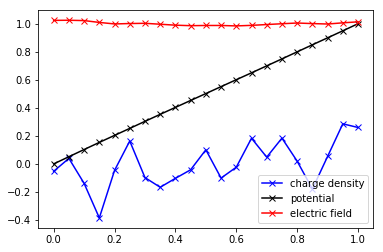

In [2]:
e=Efield(nintervals=20,voltage=1.)
ion=Species(nparticles=1000,mass=1.,charge=1.,temperature=1.)
ele=Species(nparticles=1000,mass=1/10.,charge=-1.,temperature=1.)
e.deposit(ion)
e.deposit(ele)
e.solve()
e.plot()

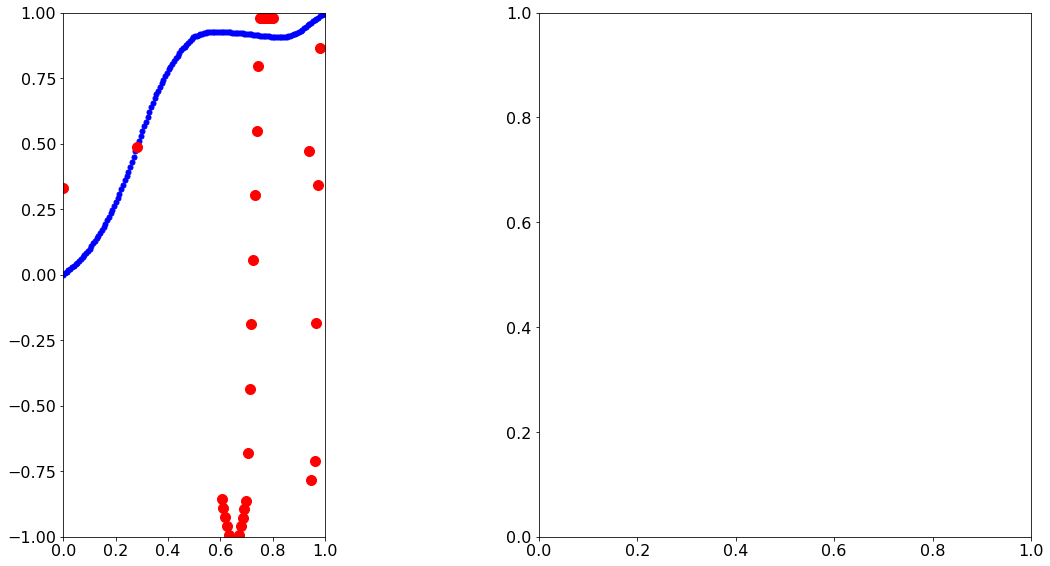

In [4]:
npart=1000
plasma_temperature=1.
dt=1.e-2
tfin=2.

e=Efield(nintervals=20,voltage=1.)
ion=Species(nparticles=1000,mass=1.,charge=1.,temperature=1.)
ele=Species(nparticles=1000,mass=1/10.,charge=-1.,temperature=1.)
e.deposit(ion)
e.deposit(ele)
e.solve()


plt.rcParams.update({'font.size': 16})
fig,(axp,axr) = plt.subplots(1,2,figsize=(16,8))
fig.subplots_adjust(left=0.05, bottom=0.08, right=0.99, top=0.99, wspace=None, hspace=None)
# plasma box
axp.set_xlim(0, 1)
axp.set_ylim(-1, 1)
axp.set_aspect('equal', adjustable='box')

pot, = axp.plot([],[],'.b',markersize=10)
cha, = axp.plot([],[],'.r',markersize=20)

def init():
    pot.set_data([],[])
    cha.set_data([],[])
    
    return pot,cha

def animate(i):
    global dt, axp, axr, fig, e, ion, ele
    
    #subsampling
    ion.push(dt,e)
    ele.push(dt,e)
    e.deposit(ion)
    e.deposit(ele)
    e.solve()
        
    x=np.linspace(0.,1.,150)
    pot.set_data(x,e.eval_potential(x))
    cha.set_data(x,e.eval_charge_density(x))
    
    return pot,cha

ani = anim.FuncAnimation(fig,animate,frames=int(tfin/dt),interval=10,blit=True,init_func=init)

ani.save('vlasov_solver.mp4',fps=24,extra_args=['-vcodec','libx264'])
    
plt.show()

In [ ]:
ion.plot()
ion.push(0.01,e)

In [ ]:
for i in range(5,2,-1):
    print(i)

In [ ]:
e=Efield(nintervals=100,voltage=0.)
e.charge_density=1.+0.*e.grid
e.solve()
e.plot()
plt.plot(e.grid,1./2.*e.grid*(e.grid-1.))
plt.plot(e.grid,e.grid-0.5)